#### Exercício 1: Visualizando a distribuição do orçamento

Maria é uma analista de marketing que trabalha com análise de campanhas publicitárias em diferentes plataformas. Recentemente, ela recebeu a tarefa de apresentar a distribuição do orçamento de marketing da empresa entre as principais plataformas utilizadas: Instagram, Google Ads, e LinkedIn. O objetivo é demonstrar visualmente qual plataforma recebe a maior parte dos recursos.

Qual gráfico seria ideal para Maria utilizar, considerando que ela deseja mostrar a composição do orçamento de marketing entre as plataformas? Gere o gráfico correto utilizando Python e explique por que ele é o mais apropriado.

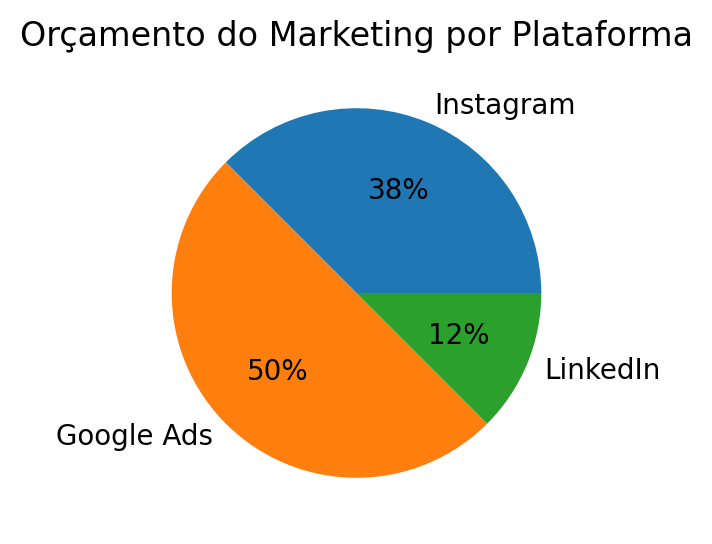

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_1.csv')

plt.figure(figsize=(5,3), dpi=200)
plt.title('Orçamento do Marketing por Plataforma', fontsize=12)
plt.pie(data=df,
        x='Orcamento (em mil)',
        labels=df['Plataforma'],
        autopct='%1.f%%')
plt.show()

#### Exercício 2: Verificando as proporções

João Fonseca é um gerente de produtos em uma empresa especializada na venda de dispositivos eletrônicos. Ele recebeu um relatório com as vendas de diferentes tipos de dispositivos, mas deseja apresentar como as vendas estão divididas entre duas categorias principais: "Smartphones" e "Outros dispositivos". Isso ajudará a equipe a entender a relevância de cada categoria no faturamento total.

Qual gráfico seria ideal para João utilizar, considerando que ele precisa apresentar a proporção de vendas entre as categorias "Smartphones" e "Outros dispositivos"? Gere o gráfico correto utilizando Python e explique por que ele é o mais apropriado.

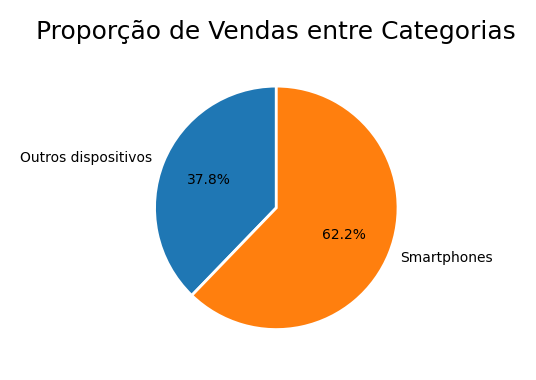

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_2.csv')
df_grouped = df.groupby('Categoria')['Vendas (em mil)'].sum().reset_index()

plt.figure(figsize=(3,2), dpi=200)
plt.title('Proporção de Vendas entre Categorias', fontsize=9)
plt.pie(data=df_grouped, 
        x='Vendas (em mil)', 
        labels=df_grouped['Categoria'],
        autopct='%1.1f%%',
        textprops= {'fontsize': 5},
        wedgeprops= {'edgecolor': 'white'},
        startangle=90)

plt.tight_layout()
plt.show()


#### Exercício 3: Acompanhando o impacto financeiro

Ana é uma analista financeira e opera no setor de alimentos. Ela recebeu a tarefa de apresentar o impacto financeiro de diferentes fatores nos lucros de um restaurante da rede. A análise deve considerar a receita total, custos com fornecedores, despesas operacionais e o lucro final. O objetivo é destacar como cada componente afeta o lucro líquido.

Qual gráfico seria ideal para Ana utilizar, considerando que ela precisa mostrar como cada fator financeiro contribui para o cálculo do lucro final? Crie um gráfico utilizando Python e explique por que ele é o mais apropriado.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

df = pd.read_csv('.\\dados\\atividade_3.csv')

fig = go.Figure(go.Waterfall(
    measure= df['Tipo'],
    y=df['Valor'],
    x=df['Categoria'],
    text=[f'R${v:,.2f}' for v in df['Valor']]
))

fig.update_layout(
    title='Acompanhamento do Impacto Financeiro',
    title_font=dict(size=20),
    plot_bgcolor = 'white',
    yaxis_title = 'Valores (R$)'
)

fig.show()


#### Exercício 4: Comparando o desempenho por regiões

Beatriz é uma gerente de vendas em uma empresa que vende produtos sustentáveis em três regiões: Norte, Sul, e Centro-Oeste. Ela precisa apresentar como o faturamento de cada região está distribuído entre três categorias de produtos: Alimentos Orgânicos, Produtos de Limpeza Sustentáveis, e Utensílios Ecológicos. O objetivo é comparar o desempenho entre as regiões e entender qual categoria contribui mais para o total de vendas em cada local.

Qual gráfico seria mais adequado para Beatriz apresentar a composição das vendas entre as categorias de produtos em cada região?

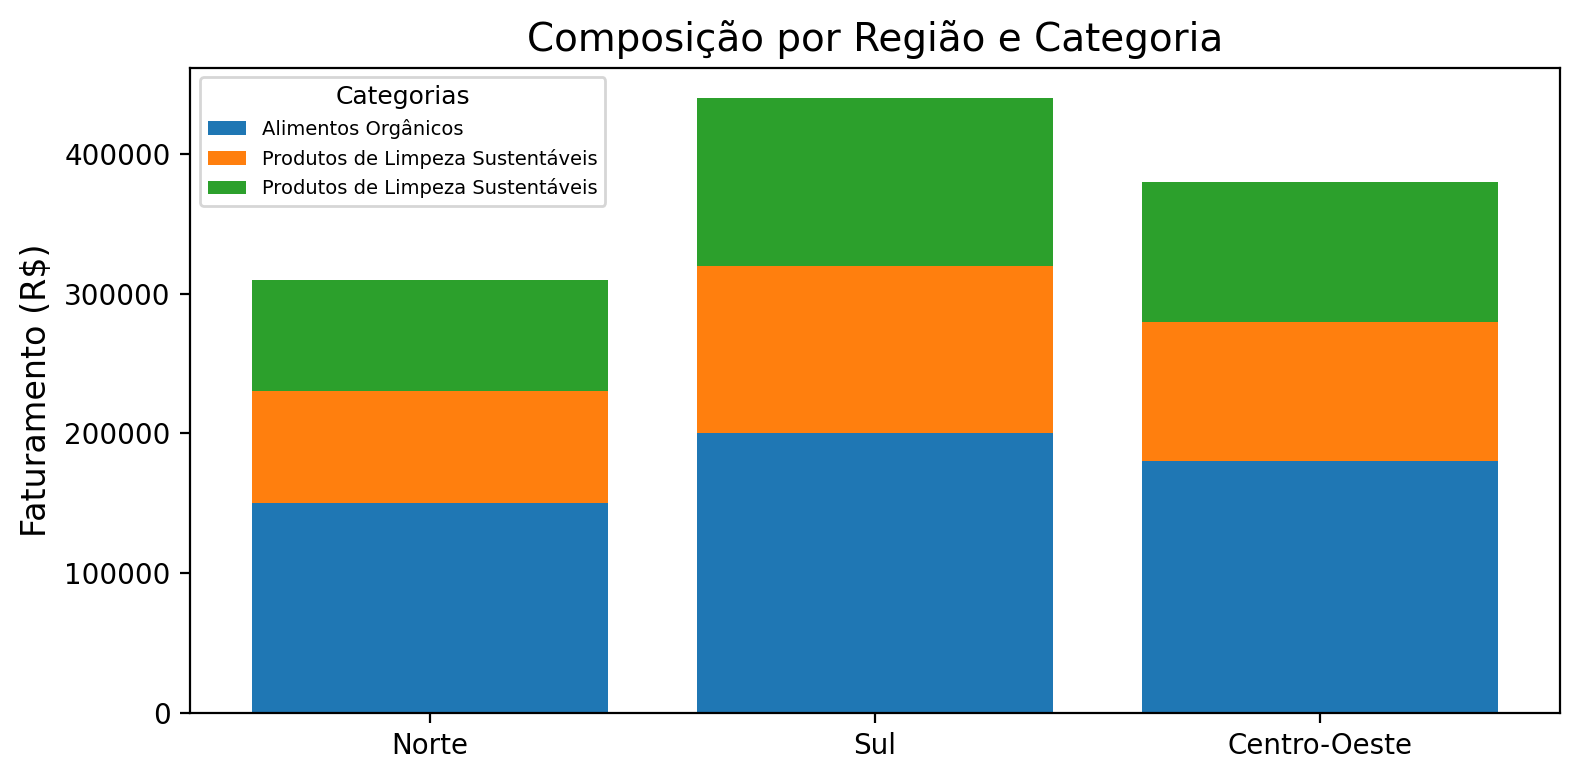

,Região,Alimentos Orgânicos,Produtos de Limpeza Sustentáveis,Utensílios Ecológicos
0,Norte,150000,80000,60000
1,Sul,200000,120000,90000
2,Centro-Oeste,180000,100000,75000


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_4.csv')

categorias = df.drop(columns='Região').columns.to_list()
regioes = df['Região']
valores = [df[categoria] for categoria in categorias]

x = np.arange(len(regioes))

fig, ax = plt.subplots(figsize=(8,4), dpi=200)

ax.bar(x, valores[0], label='Alimentos Orgânicos')
ax.bar(x, valores[1], bottom=valores[0], label='Produtos de Limpeza Sustentáveis')
ax.bar(x, valores[1], bottom=valores[0] + valores[1], label='Produtos de Limpeza Sustentáveis')

ax.set_title('Composição por Região e Categoria', fontsize=14)
ax.set_ylabel('Faturamento (R$)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(regioes)
ax.legend(title='Categorias', loc='upper left', fontsize=7, title_fontsize=9)

plt.tight_layout()
plt.show()

df

#### Exercício 5: Entendendo o relatório das filiais

Lucas é um analista de desempenho em uma empresa de tecnologia que oferece três tipos de serviços: Consultoria, Desenvolvimento de Software, e Suporte Técnico. Ele recebeu um relatório bruto com informações das receitas obtidas por serviço em diferentes filiais (São Paulo, Rio de Janeiro e Belo Horizonte). Ele precisa criar um gráfico para mostrar a composição das receitas em cada filial, destacando o impacto de cada tipo de serviço no total.

Com base nos dados fornecidos, qual gráfico seria mais adequado para Lucas apresentar a composição das receitas entre os tipos de serviço em cada filial?

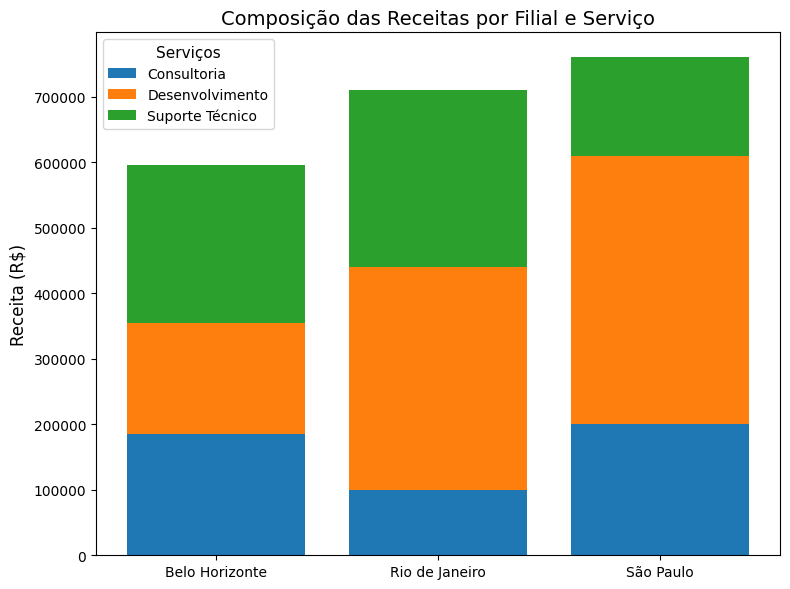

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_5.csv')

df_grouped = df.groupby(['Filial', 'Serviço'])['Receita (R$)'].sum().unstack()

servicos = df_grouped.columns
filiais = df_grouped.index
x = np.arange(len(filiais))
valores = [df_grouped[servico].values for servico in servicos]

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

ax.bar(x, valores[0], label=servicos[0])
ax.bar(x, valores[1], bottom=valores[0], label=servicos[1])
ax.bar(x, valores[2], bottom=valores[0] + valores[1], label=servicos[2])

ax.set_title('Composição das Receitas por Filial e Serviço', fontsize=14)
ax.set_xticks(x, filiais)
ax.set_ylabel('Receita (R$)', fontsize=12)
ax.legend(servicos, title='Serviços', title_fontsize=11)

plt.tight_layout()
plt.show()

#### Exercício 6: Desempenho das fontes ao longo do tempo

Fernanda é analista de dados em uma empresa que monitora a geração de energia renovável ao longo do tempo. A empresa trabalha com três fontes principais: Solar, Eólica, e Hidrelétrica. Fernanda recebeu dados diários de geração de energia para os últimos 12 meses e precisa criar um gráfico que mostre como cada fonte contribuiu para a geração total ao longo do tempo.

Qual gráfico seria mais adequado para Fernanda demonstrar a composição da geração de energia ao longo do tempo? Crie o gráfico utilizando Python.

In [27]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('.\\dados\\atividade_6.csv')

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Data'], y =df['Solar'],
    mode='lines', fill='tonexty',
    name='Solar'
))

fig.add_trace(go.Scatter(
    x=df['Data'], 
    y=df['Eólica'] + df['Solar'],
    fill='tonexty', name='Eólica'
))

fig.add_trace(go.Scatter(
    x=df['Data'],
    y=df['Eólica'] + df['Solar'] + df['Hidrelétrica'],
    fill='tonexty', name='Hidrelétrica'
))

fig.update_layout(
    title='Composição de geração de energia ao longo do tempo',
    font=dict(size=12),
    xaxis_title='Data',
    yaxis_title='Geração de Energia (MWh)',
    legend_title='Fontes de Energia',
    plot_bgcolor = 'white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()


#### Exercício 7: Observando relações entre variáveis

Gabriel é um analista de desempenho em uma empresa de logística. Ele recebeu um conjunto de dados que relaciona o tempo de entrega (em horas) e a distância percorrida (em quilômetros) de várias entregas realizadas no último mês. O objetivo de Gabriel é entender se existe uma correlação entre o tempo de entrega e a distância percorrida.

Qual gráfico seria mais adequado para Gabriel identificar a relação entre a distância percorrida e o tempo de entrega? Faça o gráfico utilizando Python.

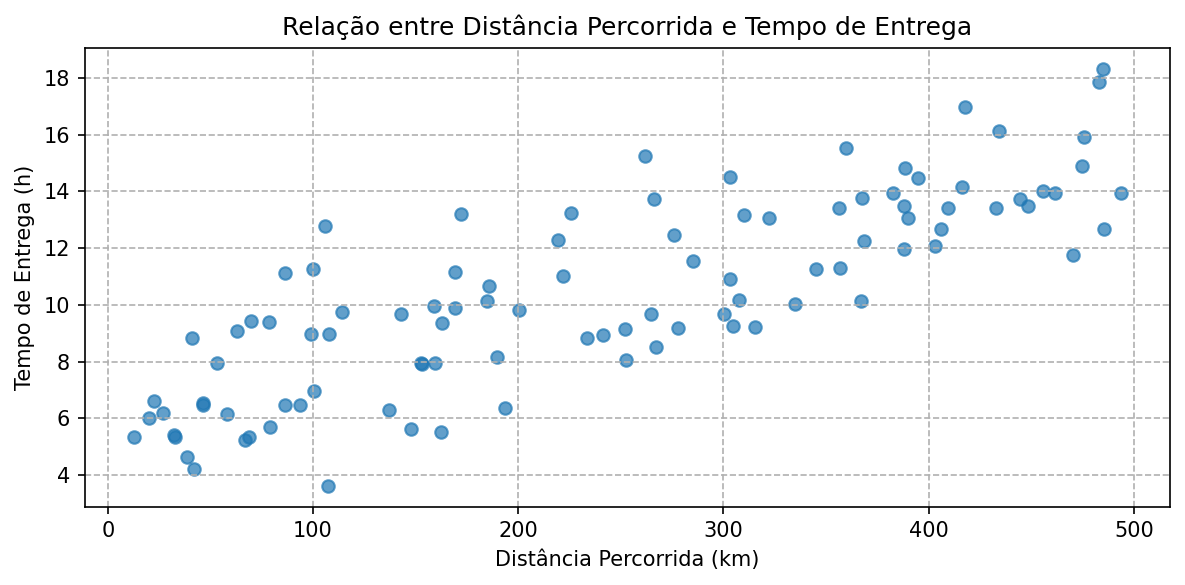

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_7.csv')

df.head()

plt.figure(figsize=(8,4), dpi=150)

plt.grid(True, linestyle='--')
plt.scatter(
    x=df['Distância (km)'],
    y=df['Tempo de Entrega (h)'],
    alpha=0.7
)
plt.xlabel('Distância Percorrida (km)')
plt.ylabel('Tempo de Entrega (h)')
plt.title('Relação entre Distância Percorrida e Tempo de Entrega')

plt.tight_layout()
plt.show()

#### Exercício 8: Avaliando variáveis em vendas

Larissa é uma analista de vendas. Ela está analisando como o valor do pedido (em reais) está relacionado com o tempo médio gasto no site (em minutos) pelos clientes. Além disso, o conjunto de dados contém informações extras, como número de produtos comprados e região geográfica do cliente.

Como Larissa conseguiria gerar um gráfico para analisar a relação entre o tempo gasto no site e o valor do pedido?

Text(0, 0.5, 'Valor do Pedido (R$))')

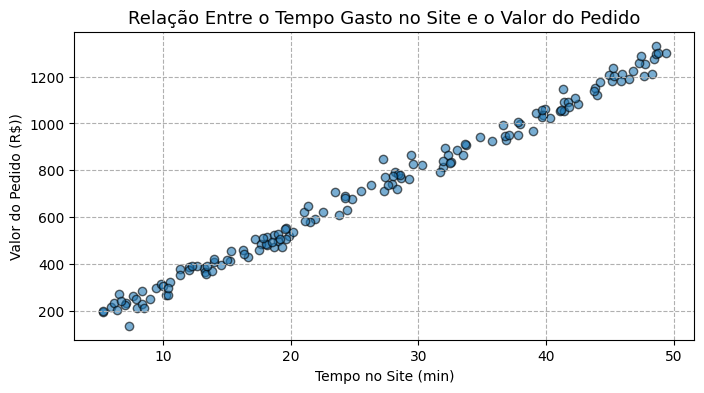

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_8_9.csv')

plt.figure(figsize=(8,4))
plt.grid(True, linestyle='--')

plt.scatter(
    x=df['Tempo no Site (min)'],
    y=df['Valor do Pedido (R$)'],
    alpha=0.6,
    edgecolors='k'
)

plt.title('Relação Entre o Tempo Gasto no Site e o Valor do Pedido', fontsize=13)
plt.xlabel('Tempo no Site (min)', fontsize=10)
plt.ylabel('Valor do Pedido (R$))', fontsize=10)

#### Exercício 9: Adicionando a reta de tendência

Larissa apresentou o gráfico de dispersão que relaciona o tempo no site e o valor do pedido para análise. No entanto, um dos gestores sugeriu incluir uma reta de tendência para facilitar a visualização do padrão geral nos dados. Agora, Larissa precisa ajustar o gráfico para incluir essa linha.

O gráfico anterior foi configurado apenas com os pontos de dispersão, sem a reta de tendência.

Com base no gráfico criado anteriormente, como Larissa pode adicionar uma reta de tendência para destacar a relação linear entre o tempo no site e o valor do pedido? Crie o código necessário para modificar o gráfico original.

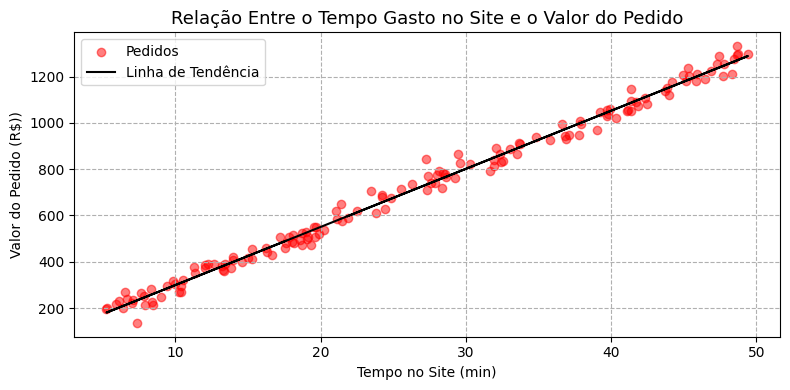

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_8_9.csv')

coef = np.polyfit(list(df['Tempo no Site (min)']), list(df['Valor do Pedido (R$)']), 1)
linha_tendencia = np.polyval(coef, df['Tempo no Site (min)'])

plt.figure(figsize=(8,4))

plt.scatter(
    x=df['Tempo no Site (min)'],
    y=df['Valor do Pedido (R$)'],
    alpha=0.5,
    color='red',
    label='Pedidos'
)

plt.plot(df['Tempo no Site (min)'], linha_tendencia,
         linewidth=1.5, color='black', label='Linha de Tendência')


plt.title('Relação Entre o Tempo Gasto no Site e o Valor do Pedido', fontsize=13)
plt.xlabel('Tempo no Site (min)', fontsize=10)
plt.ylabel('Valor do Pedido (R$))', fontsize=10)

plt.legend()

plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

#### Exercício 10: Construindo uma correlação

Carlos é um cientista de dados em uma fintech que trabalha com a análise de dados financeiros de clientes. Ele recebeu um conjunto de dados que inclui informações sobre renda mensal, gastos mensais, poupança acumulada, e idade de clientes.

O objetivo é entender como essas variáveis se relacionam entre si, identificando padrões que podem ser úteis para estratégias de personalização de serviços financeiros. Crie uma matriz de correlação para as variáveis fornecidas, utilizando Seaborn e Matplotlib. Qual insight você pode obter sobre as relações entre as variáveis analisadas?

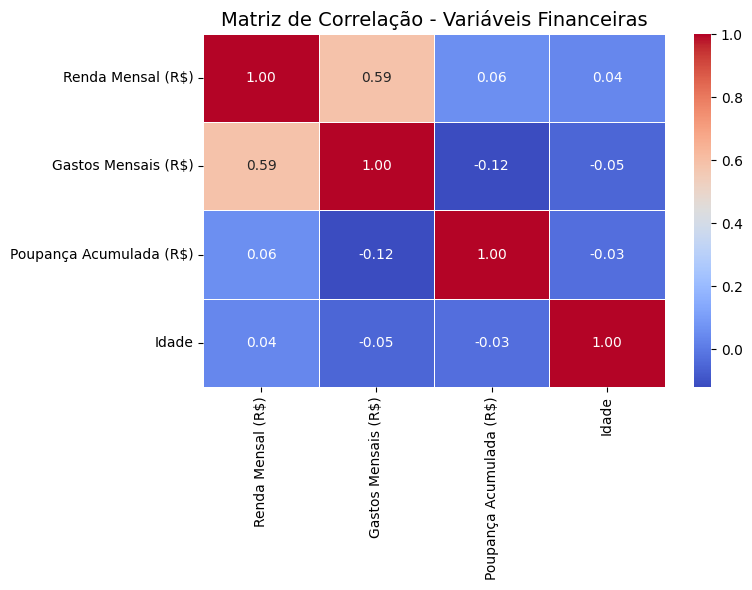

In [143]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('.\\dados\\atividade_10.csv')

correlacao = df.corr()

plt.figure(figsize=(8,6))

sn.heatmap(correlacao, annot=True, 
           cmap='coolwarm', fmt='.2f',
           linewidths=0.5)

plt.title('Matriz de Correlação - Variáveis Financeiras', fontsize=14)

plt.tight_layout()
plt.show()
